# Project 2 - Ames Housing Prediction

*Primary Learning Objectives:*
  - Creating and iterative refining a regression model
  - Using Kaggle to practice the modeling process
  - Providing business insights through reporting and presentation

## 1. Problem Statement

We are a team of data scientists engaged by a real estate company to create a Machine Learning model that predicts the sale price of residential properties in Ames, Iowa with higher accuracy and more features as compared to available apps in the market and deploy it on an Application Programming Interface (API) for their agents. 

## 2. Exploratory Data Analysis

Our model will be based on the Ames Housing Dataset ([link to Kaggle Dataset](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data)) with estimated over 80 columns of different features relating to houses in Ames, Iowa from 2006 to 2010. The information of the 80 columns can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Some background story about Ames, Iowa:

Based on a United States Census Bureau report in 2010, Ames, Iowa has a population of approximately 59,000 and their economy is largely defined by Iowa State University. It is a public research university which is located in the middle of the city and most of the Ames's population are either students or faculty member of the Iowa State University.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pd.set_option('max_columns', None)
pd.set_option('display.max_rows', None)

### Data Cleaning for Train Dataset

In general, the goal of this data cleaning procedure is to:

1. Remove features that we do not want to use in the model based on the percentage of missing values of each feature.

2. Create new features with better insights of the dataset using current features.

3. Transform features to proper format such as filling in missing value and dummify categorical features.

In [2]:
df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#Print Shape of data

df.shape

(2051, 81)

In [5]:
#check null values percentage

null_values = df.isnull().sum()*100/len(df)
print(null_values[null_values > 0].sort_values(ascending=False).round(2))

Pool QC           99.56
Misc Feature      96.83
Alley             93.17
Fence             80.50
Fireplace Qu      48.76
Lot Frontage      16.09
Garage Yr Blt      5.56
Garage Cond        5.56
Garage Qual        5.56
Garage Finish      5.56
Garage Type        5.51
Bsmt Exposure      2.83
BsmtFin Type 2     2.73
Bsmt Cond          2.68
Bsmt Qual          2.68
BsmtFin Type 1     2.68
Mas Vnr Area       1.07
Mas Vnr Type       1.07
Bsmt Half Bath     0.10
Bsmt Full Bath     0.10
Total Bsmt SF      0.05
Bsmt Unf SF        0.05
BsmtFin SF 2       0.05
Garage Cars        0.05
Garage Area        0.05
BsmtFin SF 1       0.05
dtype: float64


In [6]:
#1. Drop columns with more than 15% of the data

drop_columns = ['Pool QC','Misc Feature', 'Alley','Fence','Fireplace Qu','Lot Frontage']
df.drop(columns=drop_columns, inplace=True)

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [7]:
#2. Create new columns using 'Yr Sold - Year built', 'Yr Remod/Add - Year Built' and 'Yr Sold - Garage Yr Blt'

df['Age_built'] = df['Yr Sold'] - df['Year Built']
df['Age_remod'] = df['Year Remod/Add'] - df['Year Built']
df['Age_garage'] = df['Yr Sold'] - df['Garage Yr Blt']

We need to make sure the newly created features make sense by:
  - Yr Sold >= Year Built
  - Year Remod/Add >= Year Built
  - Yr Sold >= Garage Yr Blt

In [8]:
# Check for Negative values

print(df['Age_built'].min())
print(df['Age_remod'].min())
print(df['Age_garage'].min())

#Observe data

df[(df['Age_built']<0)|(df['Age_remod']<0)|(df['Age_garage']<0)]

-1
-1
-200.0


,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Age_built,Age_remod,Age_garage
1003,851,907194160,20,RL,10739,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,1259.0,Unf,0.0,172.0,1431.0,GasA,Ex,Y,SBrkr,1444,0,0,1444,1.0,0.0,2,0,3,1,Gd,6,Typ,0,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,144,40,0,0,0,0,0,4,2009,WD,203000,7,-1,7.0
1699,2261,916384070,20,RL,8298,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,0,9,2007,New,267300,1,1,-200.0
1885,2181,908154195,20,RL,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,183850,-1,1,-1.0


We can observe that there are some discrepancy after transforming the features to new features. Logically, the minimum age of house, house after remodulation and garage should be zero. As there are negative values, this means that the data is flawed. Therefore, we need to look at the particular row and find out which data is wrongly recorded or keyed in.

After observing the data closely, we can see that for row 1699, 'Garage Yr Blt' is 2207 which could be a typographical error since the dataset ranges from 2006 to 2010. Thus, we will change the 'Garage Yr Blt' to 2007 instead.

While for row 1003, the 'Year Remod/Add', remodel date is lower than than the 'Year Built', construction date. Based on the dataset description, 'Year Remod/Add' should be same as construction date if no remodeling or additions and if there is remodeling, the year should be higher than the construction date. Therefore, we will input the remodulation date to be same as construction date, 2002.

For row 1885, the 'Yr Built' is lower than 'Yr Sold', and the 'Garage Yr Blt' is higher than the 'Yr Sold'. Thus, we will input the 'Yr Built' to be 2007, same year as 'Yr Sold' and 'Garage Yr Blt' to be 2007 too.

In [9]:
#Change the Year

df.loc[1699,['Garage Yr Blt']] = 2007
df.loc[1003,['Year Remod/Add']] = 2002
df.loc[1885,['Year Built','Year Remod/Add']] = 2008


df['Age_built'] = df['Yr Sold'] - df['Year Built']
df['Age_remod'] = df['Year Remod/Add'] - df['Year Built']
df['Age_garage'] = df['Yr Sold'] - df['Garage Yr Blt']

Remove these features as they are already captured in the new features.

In [10]:
# Remove 'Year Remod/Add' and 'Year Built' Column

df.drop(columns=['Yr Sold','Year Remod/Add', 'Year Built', 'Garage Yr Blt'], inplace=True)

Fill in the missing values for numerical features with the mean of each feature.

In [11]:
#3. Dealing with numerical data

num_df = df.select_dtypes(include=['float64', 'int64'])
num_df = num_df.fillna(num_df.mean())

Fill in the missing values for categorical features with the mode of each feature.

In [12]:
#4. Dealing with categorical data

obj_df = df.select_dtypes(include=['object'])
obj_df = obj_df.fillna(obj_df.mode().iloc[0])

We would also want to drop categorical features with:
   - more than 95% of the feature's data relates to the one category as these features does not provide us with much infomation

In [13]:
obj_df.describe()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
count,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051
unique,7,2,4,4,3,5,3,28,9,8,5,8,6,6,15,15,4,4,5,6,5,5,4,6,6,5,5,2,5,4,8,6,3,5,5,3,9
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD
freq,1598,2044,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,1619,2025,724,721,1240,1247,1778,926,942,1889,1397,670,1805,2018,1065,1910,1868,1047,1915,1326,963,1946,1982,1861,1781


In [14]:
obj_df.shape

(2051, 37)

In [15]:
# I wanted to drop features with more than 10 categories to reduce columns for OHE/dummy 
# But this will eliminate neighborhood which could be potentially affecting Sale Price

# Drop categorical columns where 95% or more of the data in the feature relates to another feature 

for col in obj_df.columns:
#    if len(obj_df[col].unique()) >= 10:
#        print(col)
#        obj_df = obj_df.drop(col, axis=1) 
    if obj_df[col].value_counts()[0]/len(obj_df) > 0.95:
        print(col)
        obj_df = obj_df.drop(col, axis=1)


Street
Utilities
Land Slope
Condition 2
Roof Matl
Heating
Garage Cond


In [16]:
obj_df.shape

# 3 columns are dropped

(2051, 30)

In [17]:
#Check null values 
print(num_df.isnull().sum().sum())
print(obj_df.isnull().sum().sum())

0
0


In [18]:
#5. Get_dummies for categorical data
dummies = pd.get_dummies(obj_df)

In [19]:
print(len(dummies.columns))

# Note that the train dummies has 175 columns and test dummies has 153 columns

201


In [20]:
print(len(num_df.columns))

# Note that the train dataset has 1 extra numerical data column than the test dataset 

37


### Data Cleaning for Test Dataset

Data cleaning process for the test dataset (for prediction) should be the same as per train dataset to ensure consistency.

In [21]:
df_test = pd.read_csv('./datasets/test.csv')

In [22]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [23]:
# Print Shape of test data
df_test.shape

(878, 80)

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [25]:
# Check null values percentage

test_null_values = df_test.isnull().sum()*100/len(df_test)
print(test_null_values[test_null_values > 0].sort_values(ascending=False).round(2))

Pool QC           99.54
Misc Feature      95.33
Alley             93.39
Fence             80.41
Fireplace Qu      48.06
Lot Frontage      18.22
Garage Yr Blt      5.13
Garage Finish      5.13
Garage Qual        5.13
Garage Cond        5.13
Garage Type        5.01
Bsmt Exposure      2.85
BsmtFin Type 1     2.85
BsmtFin Type 2     2.85
Bsmt Cond          2.85
Bsmt Qual          2.85
Mas Vnr Area       0.11
Mas Vnr Type       0.11
Electrical         0.11
dtype: float64


In [26]:
#1. Drop columns with more than 15% of the data

drop_columns = ['Pool QC','Misc Feature', 'Alley','Fence','Fireplace Qu','Lot Frontage']
df_test.drop(columns=drop_columns, inplace=True)
print(df_test.shape)
df_test.head()

(878, 74)


,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD


In [27]:
#2. Create new columns using 'Yr Sold - Year built', 'Yr Remod/Add - Year Built' and 'Yr Sold - Garage Yr Blt'

df_test['Age_built'] = df_test['Yr Sold'] - df_test['Year Built']
df_test['Age_remod'] = df_test['Year Remod/Add'] - df_test['Year Built']
df_test['Age_garage'] = df_test['Yr Sold'] - df_test['Garage Yr Blt']

In [28]:
# Check for Negative values

print(df_test['Age_built'].min())
print(df_test['Age_remod'].min())
print(df_test['Age_garage'].min())

0
0
0.0


In [29]:
# Remove 'Year Remod/Add' and 'Year Built' Column

df_test.drop(columns=['Yr Sold','Year Built','Year Remod/Add','Garage Yr Blt'], inplace=True)

In [30]:
#3. Dealing with numerical data

test_num_df = df_test.select_dtypes(include=['float64', 'int64'])
test_num_df = test_num_df.fillna(test_num_df.mean())

In [31]:
#4. Dealing with categorical data

test_obj_df = df_test.select_dtypes(include=['object'])
test_obj_df = test_obj_df.fillna(test_obj_df.mode().iloc[0])

In [32]:
test_obj_df.describe()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
count,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878,878
unique,6,2,4,4,2,5,3,26,9,3,5,8,6,6,13,16,5,4,5,6,5,3,4,6,6,4,4,2,4,5,6,6,3,4,5,3,10
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD
freq,674,873,564,790,877,636,835,133,755,875,724,422,702,861,302,294,535,552,770,383,421,806,592,273,774,866,429,823,814,447,812,562,427,827,841,790,755


In [33]:
test_obj_df.shape

(878, 37)

In [34]:

# Drop categorical columns where 95% or more of the data in the feature relates to another feature 

for col in test_obj_df.columns:
#    if len(test_obj_df[col].unique()) >= 10:
#        print(col)
#        test_obj_df = test_obj_df.drop(col, axis=1)
    if test_obj_df[col].value_counts()[0]/len(test_obj_df) > 0.95:
        print(col)
        test_obj_df = test_obj_df.drop(col, axis=1)

Street
Utilities
Land Slope
Condition 2
Roof Matl
Heating
Garage Cond


In [35]:
test_obj_df.shape

# 4 columns are dropped

(878, 30)

In [36]:
#Check null values 
print(test_num_df.isnull().sum().sum())
print(test_obj_df.isnull().sum().sum())

0
0


In [37]:
#5. Get_dummies for categorical data
dummies_test = pd.get_dummies(test_obj_df)

In [38]:
print(len(test_num_df.columns))

# Observed that train has one extra column than test

36


In [39]:
print(len(dummies_test.columns))

# Note that the train dummies has 175 columns and test dummies has 153 columns

193


### Data Visualisations

Some visualisations to visualise the overall trend of the dataset. We will pick some of the features that generally people would be interested in with sale price of houses in Ames.

1. Sale Price Distribution
2. Living area (sqft) vs Sale Price
3. Age of house vs Sale Price
3. No. of Transactions per Neighborhood
4. Mean Sale Price by Neighborhood
4. No. of Transactions per month
5. General Zoning classification of sales vs No. of Transaction & Sale Price

In [40]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Sale Type,SalePrice,Age_built,Age_remod,Age_garage
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,WD,130500,34,29,34.0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,WD,220000,13,1,12.0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,WD,109000,57,54,57.0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,WD,174000,4,1,3.0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,WD,138500,110,93,53.0


Text(0.5, 1.0, 'Sale Price Distribution')

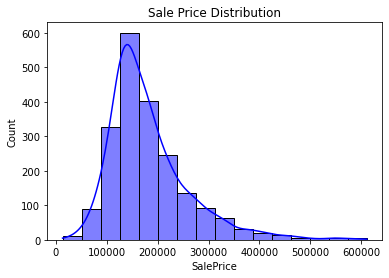

In [41]:
sns.histplot(data=df, x=df['SalePrice'], kde=True, bins=16, color='b');
plt.title("Sale Price Distribution")

From the Sale Price distribution, we can see that the Sale Price data is relatively right skewed and not distributed normally. This means that the data contains quite a few outliers. 

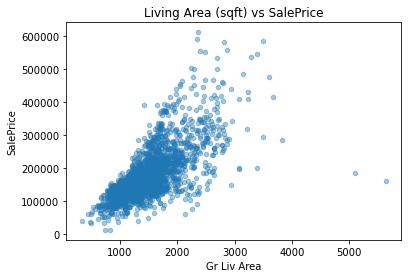

In [42]:
df.plot(x='Gr Liv Area', y='SalePrice', kind='scatter', alpha=0.4)
plt.title('Living Area (sqft) vs SalePrice')
plt.show();

From the above scattered plot, we can observe a a slight exponential relationship between the living area and the sale price. As the living area increase, the sale price also increase. Note that that are a few outliers that fall out of the 5000 sqft.

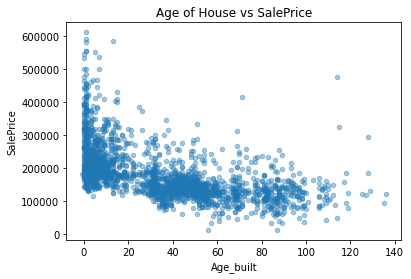

In [43]:
df.plot(x='Age_built', y='SalePrice', kind='scatter', alpha=0.4)
plt.title('Age of House vs SalePrice')
plt.show();

From the Age of house vs sale price scatter plot, an inverse relationship between the age of house and sale price is observed. As the house gets older, the value of the house will decrease. However, we can observe a few outliers such as older house having high sale price. This could be becuase some older house were renovated and sell at higher price.

Text(0.5, 1.0, 'No. of Transactions per Neighborhood')

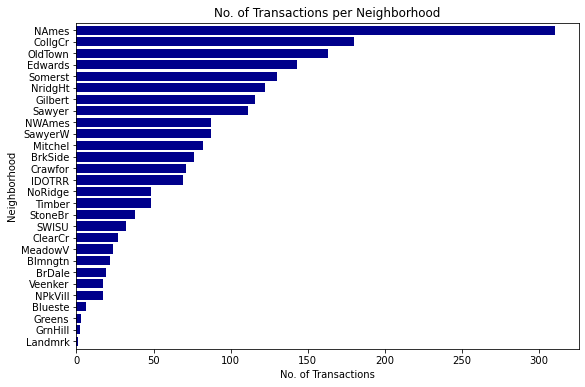

In [44]:
plt.figure(figsize=(9,6))
df['Neighborhood'].value_counts(ascending=True).plot(kind='barh', color='darkblue', width=0.8)

plt.xlabel("No. of Transactions")
plt.ylabel("Neighborhood")
plt.title("No. of Transactions per Neighborhood")

From the above bar chart, we can see that most of the transactions occurred in Northwest Ames, followed by College Creek and Old Town. This is mainly because as mentioned in the background of Ames, most of the population are students or work for the Iowa State University, they would prefer to stay near to where they stay or work. Northwest Ames, College Creek and Old Town neighborhood are all near the University and that is why these neighborhood has higher number of transaction.

Text(0.5, 1.0, 'Mean Sale Price by Neighborhood')

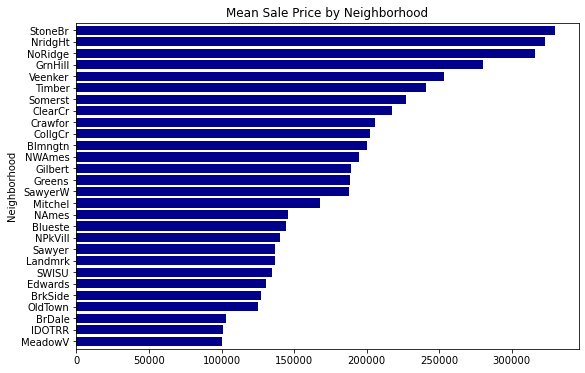

In [45]:
plt.figure(figsize=(9,6))
df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = True).plot(kind='barh', color='darkblue', width=0.8);

plt.title("Mean Sale Price by Neighborhood")

Stone Brook and Northridge Height are the top few neighborhoods with high Sale Price. The main reason for high mean sale price for Stone Brook is because for purchase agreement of house, buyers have to join Stone Brook Homeowners Associations and have to agreed to certain rules and regulations by the Associations. In additional, residents of Stone Brook has to pay a nominal monthly fee for maintenance and repair. Whereas for Northridge Height, even though it is located at the northern part of Ames and far from the central area, the house price is still expensive as most of the houses there are modern and newly renovated.


Text(0.5, 1.0, 'No. of Transaction vs Month')

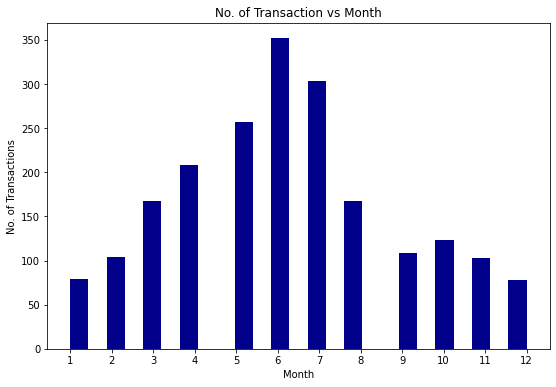

In [46]:
plt.figure(figsize=(9,6))

plt.hist(df['Mo Sold'], bins=25, color='darkblue')
plt.xticks(range(1,13,1))
plt.xlabel("Month")
plt.ylabel("No. of Transactions")
plt.title("No. of Transaction vs Month")

There are relatively more transactions occurring during summer as compared to other season.

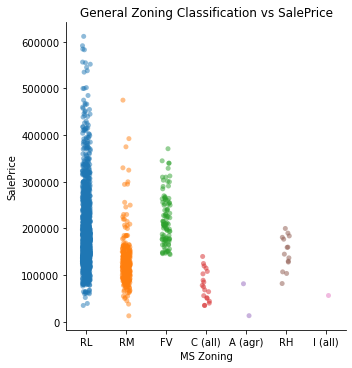

In [47]:
sns.catplot(x='MS Zoning', y='SalePrice', data=df, alpha=0.5)
plt.title('General Zoning Classification vs SalePrice')
plt.show();

From the above categorical plot, we can see that most transactions occurred in residential area. There are very little data on areas such as industrial and commercial properties. 

### Arranging Train and Test Dataset

This is to ensure that the features exist in train dataset exist in test dataset and vice versa.

In [48]:
train_num_col = list(num_df.columns)
test_num_col = list(test_num_df.columns)

dummies_test_col = list(dummies_test.columns)
dummies_col = list(dummies.columns)

In [49]:
def intersection(list1, list2):
    return list(set(list1) & set(list2))

In [50]:
num_list = intersection(train_num_col, test_num_col)
dummies_list = intersection(dummies_test_col, dummies_col)

num_list.remove('PID')

In [51]:
num_df = num_df[num_list]
test_num_df = test_num_df[num_list]

dummies = dummies[dummies_list]
dummies_test = dummies_test[dummies_list]

In [52]:
#Combine dummies data with numerical data - Train
df_final = pd.concat([num_df, dummies], axis=1)
df_final.head()

,Overall Cond,Age_garage,Screen Porch,Half Bath,MS SubClass,1st Flr SF,Overall Qual,Total Bsmt SF,Bsmt Full Bath,Id,Bedroom AbvGr,Garage Cars,Mo Sold,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Lot Area,BsmtFin SF 2,2nd Flr SF,Age_built,Age_remod,Gr Liv Area,Full Bath,Garage Area,Pool Area,BsmtFin SF 1,Kitchen AbvGr,Bsmt Unf SF,Mas Vnr Area,TotRms AbvGrd,Low Qual Fin SF,Fireplaces,Bsmt Half Bath,Misc Val,Neighborhood_Timber,House Style_2.5Unf,Exterior 2nd_HdBoard,Exter Cond_TA,Garage Finish_Fin,Neighborhood_Crawfor,Functional_Min2,Functional_Maj1,Functional_Mod,Sale Type_ConLD,Exterior 2nd_ImStucc,Garage Qual_TA,Neighborhood_Gilbert,Garage Type_BuiltIn,House Style_2.5Fin,House Style_SFoyer,Exterior 1st_WdShing,Paved Drive_N,Condition 1_RRAn,Exterior 1st_Wd Sdng,Sale Type_Con,Exterior 1st_CemntBd,Foundation_Stone,Roof Style_Gable,Exterior 1st_HdBoard,Mas Vnr Type_BrkFace,Bsmt Cond_Gd,Condition 1_PosN,Electrical_FuseP,Central Air_Y,Exterior 2nd_CmentBd,Foundation_Slab,Roof Style_Flat,MS Zoning_RM,House Style_1.5Fin,Neighborhood_CollgCr,Exter Cond_Po,Exterior 1st_VinylSd,Neighborhood_MeadowV,Bsmt Qual_Po,Sale Type_COD,Neighborhood_NWAmes,Foundation_PConc,Sale Type_Oth,Garage Type_Detchd,Lot Config_FR2,BsmtFin Type 1_Rec,Neighborhood_StoneBr,Roof Style_Mansard,House Style_SLvl,Exter Cond_Ex,Bsmt Exposure_Av,Garage Qual_Po,Roof Style_Gambrel,BsmtFin Type 1_ALQ,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exter Qual_Gd,Land Contour_Low,Neighborhood_Somerst,Condition 1_Feedr,Garage Qual_Fa,Condition 1_Artery,Bldg Type_Duplex,Exter Qual_Ex,Neighborhood_NPkVill,BsmtFin Type 2_BLQ,Lot Shape_IR3,Sale Type_CWD,Exterior 1st_BrkComm,Condition 1_RRNe,Exter Cond_Fa,House Style_2Story,Lot Config_FR3,BsmtFin Type 1_LwQ,Exterior 2nd_BrkFace,MS Zoning_FV,Garage Qual_Gd,Lot Config_Inside,Exter Qual_TA,Neighborhood_Veenker,Roof Style_Shed,Bsmt Exposure_Gd,Sale Type_ConLI,Foundation_Wood,MS Zoning_C (all),Exterior 2nd_Stucco,Exter Cond_Gd,BsmtFin Type 2_GLQ,Bldg Type_1Fam,Electrical_SBrkr,Garage Finish_Unf,Bsmt Qual_Ex,MS Zoning_RH,BsmtFin Type 1_Unf,Sale Type_ConLw,Exterior 1st_AsbShng,Neighborhood_BrDale,BsmtFin Type 2_ALQ,Bsmt Exposure_Mn,Roof Style_Hip,BsmtFin Type 1_BLQ,Lot Config_Corner,Exterior 2nd_Plywood,Neighborhood_OldTown,Lot Shape_IR2,Exterior 1st_AsphShn,Kitchen Qual_Fa,MS Zoning_RL,Paved Drive_Y,Condition 1_RRNn,Bsmt Qual_Fa,BsmtFin Type 2_Rec,Garage Type_Basment,Garage Type_2Types,Garage Type_CarPort,Exterior 2nd_CBlock,Bsmt Qual_Gd,Neighborhood_Blmngtn,Exterior 2nd_AsbShng,Neighborhood_Sawyer,Foundation_BrkTil,Heating QC_Fa,Sale Type_WD,Functional_Min1,Exter Qual_Fa,Exterior 1st_MetalSd,Bsmt Qual_TA,Condition 1_Norm,Neighborhood_Edwards,Kitchen Qual_Gd,Mas Vnr Type_Stone,Bsmt Cond_Fa,Electrical_FuseF,Neighborhood_SawyerW,Mas Vnr Type_None,BsmtFin Type 1_GLQ,Bsmt Exposure_No,Heating QC_Gd,Neighborhood_NridgHt,Functional_Maj2,Bldg Type_Twnhs,Neighborhood_ClearCr,Functional_Typ,Neighborhood_Mitchel,Exterior 2nd_MetalSd,Sale Type_New,Lot Config_CulDSac,Lot Shape_Reg,Condition 1_PosA,Electrical_FuseA,Exterior 2nd_AsphShn,Garage Finish_RFn,Condition 1_RRAe,Bldg Type_2fmCon,Exterior 2nd_Wd Shng,Exterior 2nd_Brk Cmn,Kitchen Qual_TA,Kitchen Qual_Ex,Neighborhood_Blueste,House Style_1Story,Paved Drive_P,Land Contour_Lvl,MS Zoning_I (all),Neighborhood_NAmes,Exterior 1st_BrkFace,BsmtFin Type 2_Unf,House Style_1.5Unf,Exterior 1st_Plywood,BsmtFin Type 2_LwQ,Heating QC_TA,Heating QC_Ex,Garage Type_Attchd,Neighborhood_SWISU,Neighborhood_IDOTRR,Neighborhood_BrkSide,Foundation_CBlock,Land Contour_HLS,Lot Shape_IR1,Neighborhood_NoRidge,Central Air_N,Mas Vnr Type_BrkCmn,Bsmt Cond_TA,Bldg Type_TwnhsE,Neighborhood_Greens,Land Contour_Bnk,Exterior 1st_Stucco
0,8,34.0,0,1,60,725,6,725.0,0.0,109,3,2.0,3,0,44,0,0,13517,0.0,754,34,29,1479,2,475.0,0,533.0,1,192.0,289.0,6,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [53]:
df_final['SalePrice'] = df['SalePrice']

In [54]:
df_final.shape

(2051, 223)

In [55]:
#Combine dummies data with numerical data - Test
test_df_final = pd.concat([test_num_df, dummies_test], axis=1)
test_df_final.head()

,Overall Cond,Age_garage,Screen Porch,Half Bath,MS SubClass,1st Flr SF,Overall Qual,Total Bsmt SF,Bsmt Full Bath,Id,Bedroom AbvGr,Garage Cars,Mo Sold,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Lot Area,BsmtFin SF 2,2nd Flr SF,Age_built,Age_remod,Gr Liv Area,Full Bath,Garage Area,Pool Area,BsmtFin SF 1,Kitchen AbvGr,Bsmt Unf SF,Mas Vnr Area,TotRms AbvGrd,Low Qual Fin SF,Fireplaces,Bsmt Half Bath,Misc Val,Neighborhood_Timber,House Style_2.5Unf,Exterior 2nd_HdBoard,Exter Cond_TA,Garage Finish_Fin,Neighborhood_Crawfor,Functional_Min2,Functional_Maj1,Functional_Mod,Sale Type_ConLD,Exterior 2nd_ImStucc,Garage Qual_TA,Neighborhood_Gilbert,Garage Type_BuiltIn,House Style_2.5Fin,House Style_SFoyer,Exterior 1st_WdShing,Paved Drive_N,Condition 1_RRAn,Exterior 1st_Wd Sdng,Sale Type_Con,Exterior 1st_CemntBd,Foundation_Stone,Roof Style_Gable,Exterior 1st_HdBoard,Mas Vnr Type_BrkFace,Bsmt Cond_Gd,Condition 1_PosN,Electrical_FuseP,Central Air_Y,Exterior 2nd_CmentBd,Foundation_Slab,Roof Style_Flat,MS Zoning_RM,House Style_1.5Fin,Neighborhood_CollgCr,Exter Cond_Po,Exterior 1st_VinylSd,Neighborhood_MeadowV,Bsmt Qual_Po,Sale Type_COD,Neighborhood_NWAmes,Foundation_PConc,Sale Type_Oth,Garage Type_Detchd,Lot Config_FR2,BsmtFin Type 1_Rec,Neighborhood_StoneBr,Roof Style_Mansard,House Style_SLvl,Exter Cond_Ex,Bsmt Exposure_Av,Garage Qual_Po,Roof Style_Gambrel,BsmtFin Type 1_ALQ,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exter Qual_Gd,Land Contour_Low,Neighborhood_Somerst,Condition 1_Feedr,Garage Qual_Fa,Condition 1_Artery,Bldg Type_Duplex,Exter Qual_Ex,Neighborhood_NPkVill,BsmtFin Type 2_BLQ,Lot Shape_IR3,Sale Type_CWD,Exterior 1st_BrkComm,Condition 1_RRNe,Exter Cond_Fa,House Style_2Story,Lot Config_FR3,BsmtFin Type 1_LwQ,Exterior 2nd_BrkFace,MS Zoning_FV,Garage Qual_Gd,Lot Config_Inside,Exter Qual_TA,Neighborhood_Veenker,Roof Style_Shed,Bsmt Exposure_Gd,Sale Type_ConLI,Foundation_Wood,MS Zoning_C (all),Exterior 2nd_Stucco,Exter Cond_Gd,BsmtFin Type 2_GLQ,Bldg Type_1Fam,Electrical_SBrkr,Garage Finish_Unf,Bsmt Qual_Ex,MS Zoning_RH,BsmtFin Type 1_Unf,Sale Type_ConLw,Exterior 1st_AsbShng,Neighborhood_BrDale,BsmtFin Type 2_ALQ,Bsmt Exposure_Mn,Roof Style_Hip,BsmtFin Type 1_BLQ,Lot Config_Corner,Exterior 2nd_Plywood,Neighborhood_OldTown,Lot Shape_IR2,Exterior 1st_AsphShn,Kitchen Qual_Fa,MS Zoning_RL,Paved Drive_Y,Condition 1_RRNn,Bsmt Qual_Fa,BsmtFin Type 2_Rec,Garage Type_Basment,Garage Type_2Types,Garage Type_CarPort,Exterior 2nd_CBlock,Bsmt Qual_Gd,Neighborhood_Blmngtn,Exterior 2nd_AsbShng,Neighborhood_Sawyer,Foundation_BrkTil,Heating QC_Fa,Sale Type_WD,Functional_Min1,Exter Qual_Fa,Exterior 1st_MetalSd,Bsmt Qual_TA,Condition 1_Norm,Neighborhood_Edwards,Kitchen Qual_Gd,Mas Vnr Type_Stone,Bsmt Cond_Fa,Electrical_FuseF,Neighborhood_SawyerW,Mas Vnr Type_None,BsmtFin Type 1_GLQ,Bsmt Exposure_No,Heating QC_Gd,Neighborhood_NridgHt,Functional_Maj2,Bldg Type_Twnhs,Neighborhood_ClearCr,Functional_Typ,Neighborhood_Mitchel,Exterior 2nd_MetalSd,Sale Type_New,Lot Config_CulDSac,Lot Shape_Reg,Condition 1_PosA,Electrical_FuseA,Exterior 2nd_AsphShn,Garage Finish_RFn,Condition 1_RRAe,Bldg Type_2fmCon,Exterior 2nd_Wd Shng,Exterior 2nd_Brk Cmn,Kitchen Qual_TA,Kitchen Qual_Ex,Neighborhood_Blueste,House Style_1Story,Paved Drive_P,Land Contour_Lvl,MS Zoning_I (all),Neighborhood_NAmes,Exterior 1st_BrkFace,BsmtFin Type 2_Unf,House Style_1.5Unf,Exterior 1st_Plywood,BsmtFin Type 2_LwQ,Heating QC_TA,Heating QC_Ex,Garage Type_Attchd,Neighborhood_SWISU,Neighborhood_IDOTRR,Neighborhood_BrkSide,Foundation_CBlock,Land Contour_HLS,Lot Shape_IR1,Neighborhood_NoRidge,Central Air_N,Mas Vnr Type_BrkCmn,Bsmt Cond_TA,Bldg Type_TwnhsE,Neighborhood_Greens,Land Contour_Bnk,Exterior 1st_Stucco
0,8,96.0,0,0,190,908,6,1020,0,2658,4,1,4,0,60,112,0,9142,0,1020,96,40,1928,2,440,0,0,2,1020,0.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0

In [56]:
test_df_final.shape

(878, 222)

## 3. Preprocessing for Modeling

### Plot Correlation

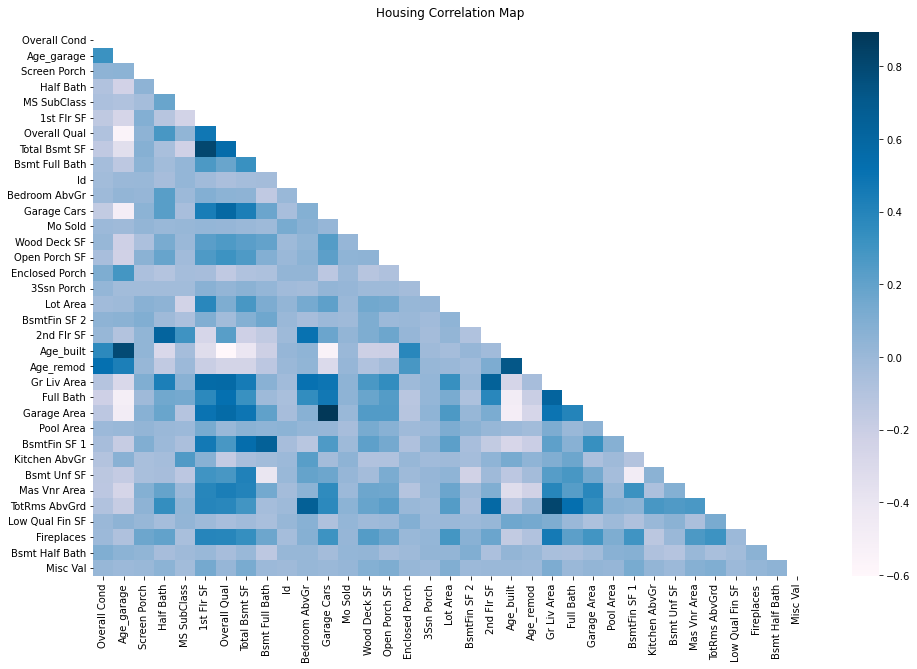

In [57]:
# PURELY NUMERICAL ONLY

plt.figure(figsize=(16,10))

#define mask to set the value in the upper triangle to True
mask = np.triu(np.ones_like(num_df.corr()))
heatmap = sns.heatmap(num_df.corr(), mask=mask, cmap='PuBu')
heatmap.set_title('Housing Correlation Map',pad=16);

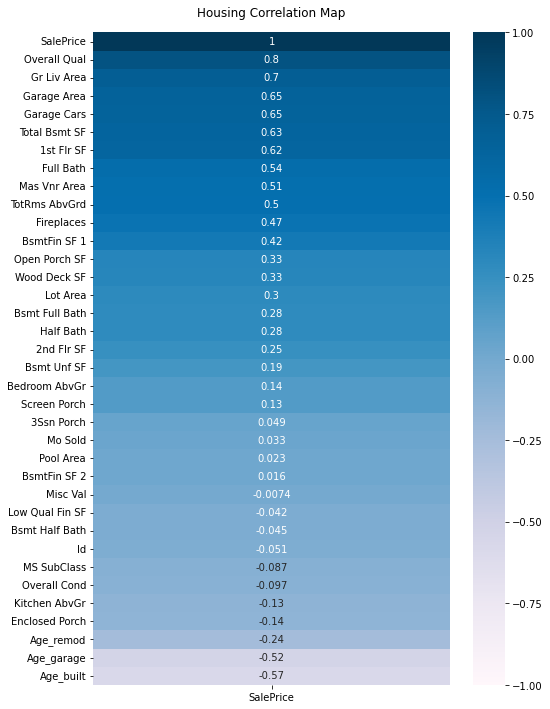

In [58]:
plt.figure(figsize=(8,12))

#define mask to set the value in the upper triangle to True
heatmap = sns.heatmap(df_final.select_dtypes(include=['float64', 'int64']).corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),vmin=-1, vmax=1, annot=True, cmap='PuBu')
heatmap.set_title('Housing Correlation Map',pad=16);

Eliminating features with weaker correlations of sale price (<0.5).

In [59]:
# Check the numerical data with strong correlations

sorted_corrs = abs(df_final.select_dtypes(include=['float64', 'int64']).corr()['SalePrice']).sort_values(ascending=False)
strong_corrs = sorted_corrs[sorted_corrs > 0.5]
strong_corrs

SalePrice        1.000000
Overall Qual     0.800207
Gr Liv Area      0.697038
Garage Area      0.650246
Garage Cars      0.648197
Total Bsmt SF    0.628668
1st Flr SF       0.618486
Age_built        0.571881
Full Bath        0.537969
Age_garage       0.523600
Mas Vnr Area     0.508602
TotRms AbvGrd    0.504014
Name: SalePrice, dtype: float64

In [60]:
selected_num_features = df_final.select_dtypes(include=['float64', 'int64'])[strong_corrs.index]
selected_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      2051 non-null   int64  
 1   Overall Qual   2051 non-null   int64  
 2   Gr Liv Area    2051 non-null   int64  
 3   Garage Area    2051 non-null   float64
 4   Garage Cars    2051 non-null   float64
 5   Total Bsmt SF  2051 non-null   float64
 6   1st Flr SF     2051 non-null   int64  
 7   Age_built      2051 non-null   int64  
 8   Full Bath      2051 non-null   int64  
 9   Age_garage     2051 non-null   float64
 10  Mas Vnr Area   2051 non-null   float64
 11  TotRms AbvGrd  2051 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 192.4 KB


In [61]:
# Check collinearity
selected_num_features = (selected_num_features-selected_num_features.min()) / ((selected_num_features.max()-selected_num_features.min()))
selected_num_features.var().sort_values()

Total Bsmt SF    0.005407
1st Flr SF       0.006934
Gr Liv Area      0.008889
Mas Vnr Area     0.011830
TotRms AbvGrd    0.014404
SalePrice        0.017516
Full Bath        0.018857
Garage Area      0.023178
Garage Cars      0.023369
Overall Qual     0.025114
Age_garage       0.044463
Age_built        0.048628
dtype: float64

In [62]:
strong_corrs_col = strong_corrs.index.tolist()

Plot scattered plot of above features to do further cleaning / removing outliers.

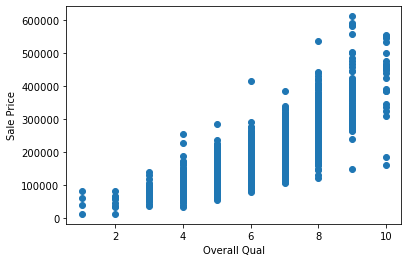

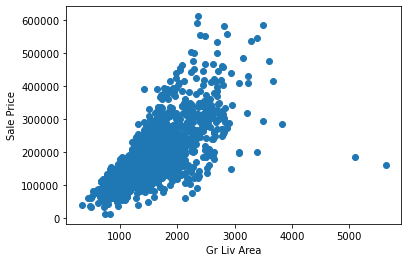

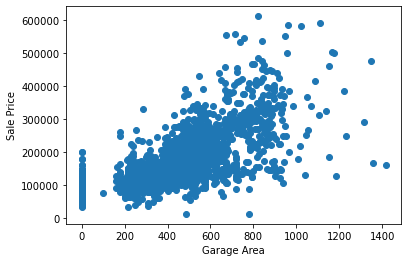

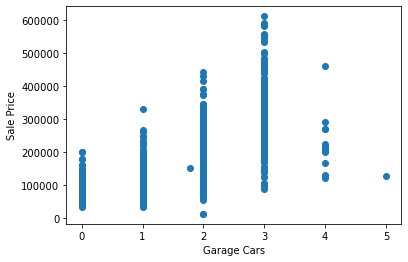

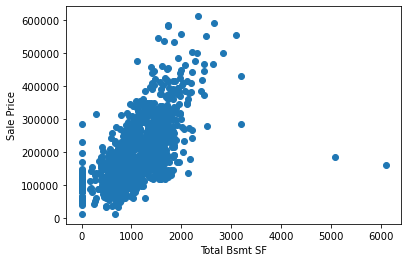

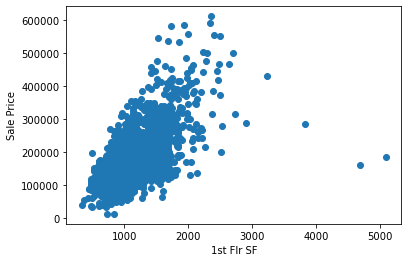

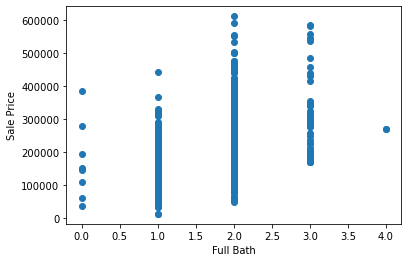

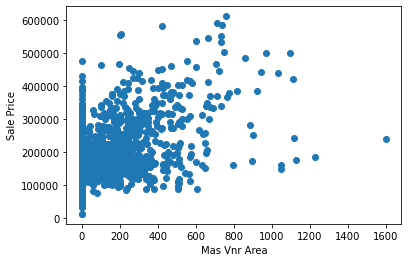

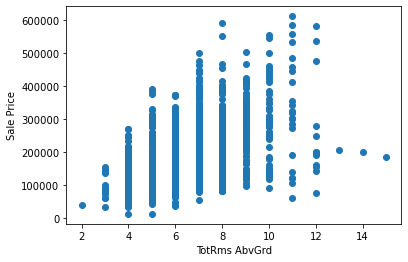

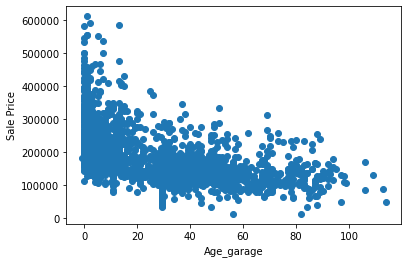

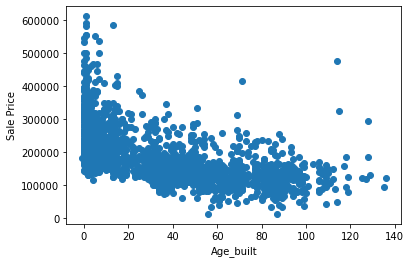

In [63]:
for col in list(df_final[strong_corrs_col].corr()[['SalePrice']].sort_values('SalePrice', ascending=False).index.values):
    
    if col != 'SalePrice':
        plt.figure()
        plt.ylabel('Sale Price')
        plt.xlabel(col)
        plt.scatter(df_final[col], df_final['SalePrice']);

### Removing Outliers

In [64]:
df_final.shape

(2051, 223)

In [65]:
df_final['SalePrice'] = df['SalePrice']

In [66]:
df_final = df_final.loc[df_final['Gr Liv Area'] < 4500]
df_final = df_final.loc[df_final['Total Bsmt SF'] < 4500]
df_final = df_final.loc[df_final['1st Flr SF'] < 3500]
df_final = df_final.loc[df_final['Mas Vnr Area'] < 1400]
df_final = df_final.loc[df_final['TotRms AbvGrd'] < 13]
df_final = df_final.loc[df_final['Garage Cars'] < 5]
df_final = df_final.loc[df_final['SalePrice'] < 400000]

In [67]:
weak_corrs = sorted_corrs[sorted_corrs < 0.5]
weak_corrs_col = weak_corrs.index.tolist()
weak_corrs_col.remove('Id')

In [68]:
weak_corrs_col

['Fireplaces',
 'BsmtFin SF 1',
 'Open Porch SF',
 'Wood Deck SF',
 'Lot Area',
 'Bsmt Full Bath',
 'Half Bath',
 '2nd Flr SF',
 'Age_remod',
 'Bsmt Unf SF',
 'Bedroom AbvGr',
 'Enclosed Porch',
 'Screen Porch',
 'Kitchen AbvGr',
 'Overall Cond',
 'MS SubClass',
 '3Ssn Porch',
 'Bsmt Half Bath',
 'Low Qual Fin SF',
 'Mo Sold',
 'Pool Area',
 'BsmtFin SF 2',
 'Misc Val']

In [69]:
df_final.drop(weak_corrs_col, axis=1, inplace=True)

In [70]:
test_df_final.drop(weak_corrs_col, axis=1, inplace=True)

In [71]:
df_final.to_csv('./datasets/clean/df_final.csv')

In [72]:
test_df_final.to_csv('./datasets/clean/test_df_final.csv')

In [73]:
df_final.shape

(1998, 200)

In [74]:
test_df_final.shape

(878, 199)

### Train-Test-Split and StandardScaler

#### Train-Test-Split

In [75]:
feature_list = list(df_final.columns)
feature_list.remove('SalePrice')

X = df_final[feature_list]
y = df_final['SalePrice']

In [76]:
#Create Train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [77]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1598, 199)
X_test shape: (400, 199)


In [78]:
X_2 = test_df_final[feature_list]

In [79]:
X_2.head()

,Age_garage,1st Flr SF,Overall Qual,Total Bsmt SF,Id,Garage Cars,Age_built,Gr Liv Area,Full Bath,Garage Area,Mas Vnr Area,TotRms AbvGrd,Neighborhood_Timber,House Style_2.5Unf,Exterior 2nd_HdBoard,Exter Cond_TA,Garage Finish_Fin,Neighborhood_Crawfor,Functional_Min2,Functional_Maj1,Functional_Mod,Sale Type_ConLD,Exterior 2nd_ImStucc,Garage Qual_TA,Neighborhood_Gilbert,Garage Type_BuiltIn,House Style_2.5Fin,House Style_SFoyer,Exterior 1st_WdShing,Paved Drive_N,Condition 1_RRAn,Exterior 1st_Wd Sdng,Sale Type_Con,Exterior 1st_CemntBd,Foundation_Stone,Roof Style_Gable,Exterior 1st_HdBoard,Mas Vnr Type_BrkFace,Bsmt Cond_Gd,Condition 1_PosN,Electrical_FuseP,Central Air_Y,Exterior 2nd_CmentBd,Foundation_Slab,Roof Style_Flat,MS Zoning_RM,House Style_1.5Fin,Neighborhood_CollgCr,Exter Cond_Po,Exterior 1st_VinylSd,Neighborhood_MeadowV,Bsmt Qual_Po,Sale Type_COD,Neighborhood_NWAmes,Foundation_PConc,Sale Type_Oth,Garage Type_Detchd,Lot Config_FR2,BsmtFin Type 1_Rec,Neighborhood_StoneBr,Roof Style_Mansard,House Style_SLvl,Exter Cond_Ex,Bsmt Exposure_Av,Garage Qual_Po,Roof Style_Gambrel,BsmtFin Type 1_ALQ,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exter Qual_Gd,Land Contour_Low,Neighborhood_Somerst,Condition 1_Feedr,Garage Qual_Fa,Condition 1_Artery,Bldg Type_Duplex,Exter Qual_Ex,Neighborhood_NPkVill,BsmtFin Type 2_BLQ,Lot Shape_IR3,Sale Type_CWD,Exterior 1st_BrkComm,Condition 1_RRNe,Exter Cond_Fa,House Style_2Story,Lot Config_FR3,BsmtFin Type 1_LwQ,Exterior 2nd_BrkFace,MS Zoning_FV,Garage Qual_Gd,Lot Config_Inside,Exter Qual_TA,Neighborhood_Veenker,Roof Style_Shed,Bsmt Exposure_Gd,Sale Type_ConLI,Foundation_Wood,MS Zoning_C (all),Exterior 2nd_Stucco,Exter Cond_Gd,BsmtFin Type 2_GLQ,Bldg Type_1Fam,Electrical_SBrkr,Garage Finish_Unf,Bsmt Qual_Ex,MS Zoning_RH,BsmtFin Type 1_Unf,Sale Type_ConLw,Exterior 1st_AsbShng,Neighborhood_BrDale,BsmtFin Type 2_ALQ,Bsmt Exposure_Mn,Roof Style_Hip,BsmtFin Type 1_BLQ,Lot Config_Corner,Exterior 2nd_Plywood,Neighborhood_OldTown,Lot Shape_IR2,Exterior 1st_AsphShn,Kitchen Qual_Fa,MS Zoning_RL,Paved Drive_Y,Condition 1_RRNn,Bsmt Qual_Fa,BsmtFin Type 2_Rec,Garage Type_Basment,Garage Type_2Types,Garage Type_CarPort,Exterior 2nd_CBlock,Bsmt Qual_Gd,Neighborhood_Blmngtn,Exterior 2nd_AsbShng,Neighborhood_Sawyer,Foundation_BrkTil,Heating QC_Fa,Sale Type_WD,Functional_Min1,Exter Qual_Fa,Exterior 1st_MetalSd,Bsmt Qual_TA,Condition 1_Norm,Neighborhood_Edwards,Kitchen Qual_Gd,Mas Vnr Type_Stone,Bsmt Cond_Fa,Electrical_FuseF,Neighborhood_SawyerW,Mas Vnr Type_None,BsmtFin Type 1_GLQ,Bsmt Exposure_No,Heating QC_Gd,Neighborhood_NridgHt,Functional_Maj2,Bldg Type_Twnhs,Neighborhood_ClearCr,Functional_Typ,Neighborhood_Mitchel,Exterior 2nd_MetalSd,Sale Type_New,Lot Config_CulDSac,Lot Shape_Reg,Condition 1_PosA,Electrical_FuseA,Exterior 2nd_AsphShn,Garage Finish_RFn,Condition 1_RRAe,Bldg Type_2fmCon,Exterior 2nd_Wd Shng,Exterior 2nd_Brk Cmn,Kitchen Qual_TA,Kitchen Qual_Ex,Neighborhood_Blueste,House Style_1Story,Paved Drive_P,Land Contour_Lvl,MS Zoning_I (all),Neighborhood_NAmes,Exterior 1st_BrkFace,BsmtFin Type 2_Unf,House Style_1.5Unf,Exterior 1st_Plywood,BsmtFin Type 2_LwQ,Heating QC_TA,Heating QC_Ex,Garage Type_Attchd,Neighborhood_SWISU,Neighborhood_IDOTRR,Neighborhood_BrkSide,Foundation_CBlock,Land Contour_HLS,Lot Shape_IR1,Neighborhood_NoRidge,Central Air_N,Mas Vnr Type_BrkCmn,Bsmt Cond_TA,Bldg Type_TwnhsE,Neighborhood_Greens,Land Contour_Bnk,Exterior 1st_Stucco
0,96.0,908,6,1020,2658,1,96,1928,2,440,0.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,29.0,1967,5,1967,2718,2,29,1967,2,580,0.0,10,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### StandardScaler

In [80]:
#list to SS:
ss_list = []
for i in num_list:
    if i not in weak_corrs_col:
        ss_list.append(i)

In [81]:
ss_list

['Age_garage',
 '1st Flr SF',
 'Overall Qual',
 'Total Bsmt SF',
 'Id',
 'Garage Cars',
 'Age_built',
 'Gr Liv Area',
 'Full Bath',
 'Garage Area',
 'Mas Vnr Area',
 'TotRms AbvGrd']

In [82]:
ss = StandardScaler()

In [83]:
#ss datasets numerical values
X_train_sc = ss.fit_transform(X_train[ss_list])
X_test_sc = ss.transform(X_test[ss_list])
X2_sc = ss.transform(X_2[ss_list])

## 4. Regression Modeling

### Linear Regression

In [84]:
#Create Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [85]:
y_train_pred_lr = lr.predict(X_train_sc)
y_test_pred_lr = lr.predict(X_test_sc)

mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)

perc_diff = (mse_train_lr - mse_test_lr)/mse_train_lr * 100
print(mse_train_lr, mse_test_lr, str(perc_diff)+"%")

753687324.5173562 747767869.2188481 0.7853993434609942%


In [86]:
# Cross Val Score - Train
cross_val_score(lr, X_train_sc, y_train).mean()

0.8266209146543918

In [87]:
# Cross Val Score - Test
cross_val_score(lr, X_test_sc, y_test).mean()

0.8071693445285874

Text(0.5, 1.0, 'House Sale Price Prediction - Linear Regression')

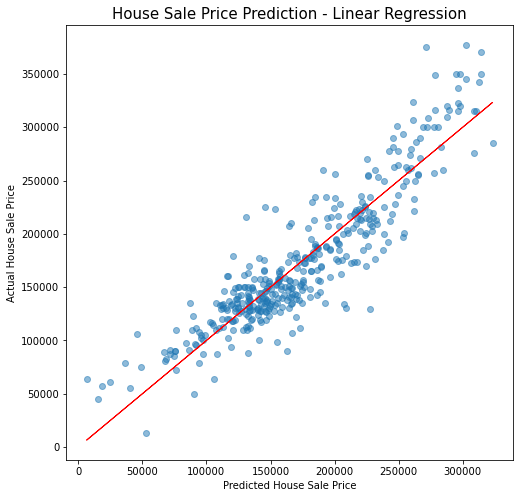

In [88]:
# plotting actual vs predicted

plt.figure(figsize=(8,8))

plt.scatter(x=y_test_pred_lr, y=y_test, alpha=0.5)
plt.plot(y_test_pred_lr, y_test_pred_lr, linewidth=1, c='red')
plt.xlabel("Predicted House Sale Price")
plt.ylabel("Actual House Sale Price")
plt.title('House Sale Price Prediction - Linear Regression', fontsize=15)

### Ridge Model

In [89]:
# Instantiate.
ridge_model = Ridge()

# Fit.
ridge_model.fit(X_train_sc, y_train)

Ridge()

In [90]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(X_train_sc, y_train)

In [91]:
# Here is the optimal value of alpha
ridge_cv.alpha

1.0

In [92]:
# Cross Val Score - Train
cross_val_score(ridge_cv, X_train_sc, y_train).mean()

0.8266318845894232

In [93]:
# Cross Val Score - Test
cross_val_score(ridge_cv, X_test_sc, y_test).mean()

0.807208446222511

In [94]:
#Predict
y_train_pred_ridge = ridge_cv.predict(X_train_sc)
y_test_pred_ridge = ridge_cv.predict(X_test_sc)

#Check MSE
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

perc_diff = (mse_train_ridge - mse_test_ridge)/mse_train_ridge * 100
print(mse_train_ridge, mse_test_ridge, str(perc_diff)+"%")

753688771.3003563 747803762.7467291 0.7808274154693315%


Text(0.5, 1.0, 'House Sale Price Prediction - Ridge')

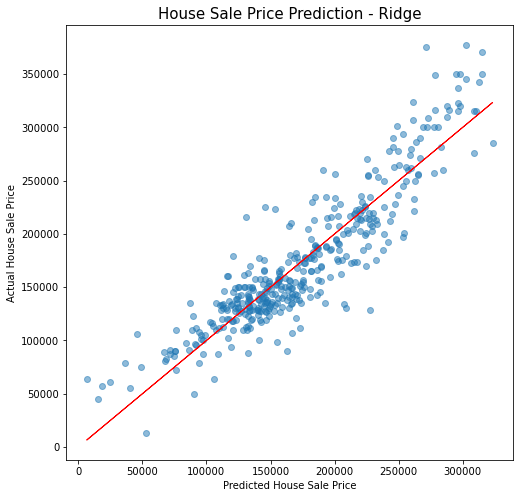

In [95]:
# plotting actual vs predicted

plt.figure(figsize=(8,8))

plt.scatter(x=y_test_pred_ridge, y=y_test, alpha=0.5)
plt.plot(y_test_pred_ridge, y_test_pred_ridge, linewidth=1, c='r')
plt.xlabel("Predicted House Sale Price")
plt.ylabel("Actual House Sale Price")
plt.title('House Sale Price Prediction - Ridge', fontsize=15)

In [96]:
residuals = y_test - y_test_pred_ridge

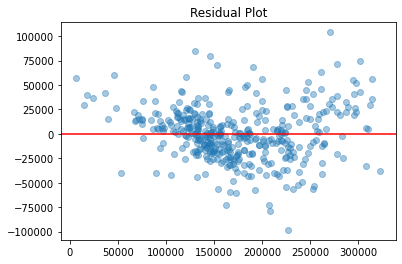

In [97]:
plt.scatter(y_test_pred_ridge, residuals, alpha=0.4)
plt.axhline(y=0, color='r')
plt.title("Residual Plot");

The distance between 0 and the plots shows how bad the prediction is. From the above residual plot, there is no clear pattern of the residuals, most residuals cluster around 0 which means our predictions are generally accurate and acceptable.

### LASSO Model

In [98]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_sc, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=50000)

In [99]:
# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [100]:
#Predict
y_train_pred_lasso = lasso_cv.predict(X_train_sc)
y_test_pred_lasso = lasso_cv.predict(X_test_sc)

#Check MSE
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

perc_diff = (mse_train_lasso - mse_test_lasso)/mse_train_lasso * 100
print(mse_train_lasso, mse_test_lasso, str(perc_diff)+"%")

753687342.7465802 747759855.8088852 0.7864649704868514%


In [101]:
# Cross Val Score
cross_val_score(lasso_cv, X_train_sc, y_train).mean()

0.8266221635055164

In [102]:
# Cross Val Score
cross_val_score(lasso_cv, X_test_sc, y_test).mean()

0.8071727784741739

Text(0.5, 1.0, 'House Sale Price Prediction - Lasso')

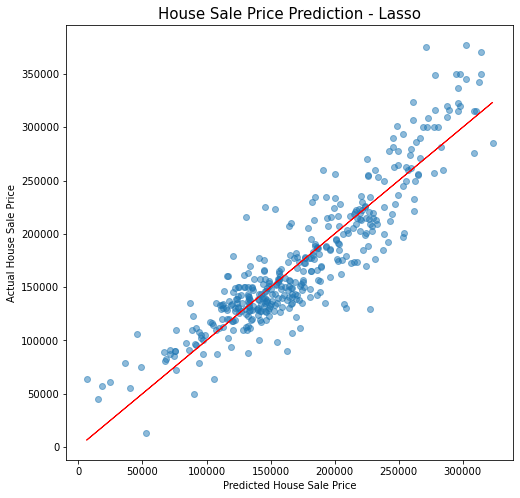

In [103]:
plt.figure(figsize=(8,8))

plt.scatter(x=y_test_pred_lasso, y=y_test, alpha=0.5)
plt.plot(y_test_pred_lasso, y_test_pred_lasso, linewidth=1, c='r')
plt.xlabel("Predicted House Sale Price")
plt.ylabel("Actual House Sale Price")
plt.title('House Sale Price Prediction - Lasso', fontsize=15)

### ElasticNet Model

In [104]:
from sklearn.linear_model import ElasticNetCV

In [105]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train_sc, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test_sc)
enet_model_preds_train = enet_model.predict(X_train_sc)

#Check MSE
mse_train_enet = mean_squared_error(y_train, enet_model_preds_train)
mse_test_enet = mean_squared_error(y_test, enet_model_preds)

perc_diff = (mse_train_enet - mse_test_enet)/mse_train_enet * 100
print(mse_train_enet, mse_test_enet, str(perc_diff)+"%")

810643692.3178338 814540208.5863246 -0.48066941190274026%


In [106]:
# Cross Val Score - Train
cross_val_score(enet_model, X_train_sc, y_train).mean()

0.8154591957779391

In [107]:
# Cross Val Score - Test
cross_val_score(enet_model, X_test_sc, y_test).mean()

0.7936294388044332

Text(0.5, 1.0, 'House Sale Price Prediction - ElasticNet')

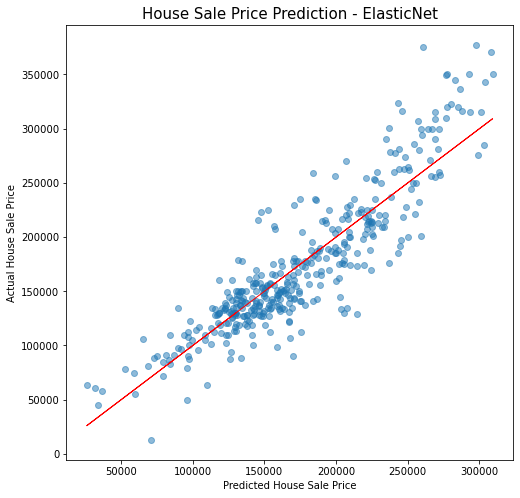

In [108]:
plt.figure(figsize=(8,8))

plt.scatter(x=enet_model_preds, y=y_test, alpha=0.5)
plt.plot(enet_model_preds, enet_model_preds, linewidth=1, c='r')
plt.xlabel("Predicted House Sale Price")
plt.ylabel("Actual House Sale Price")
plt.title('House Sale Price Prediction - ElasticNet', fontsize=15)

### Summary:

1. Linear Regression
    - MSE: 0.785%
    - cross-val score: 0.8071693445285872
2. Ridge
    - MSE: 0.781%
    - cross-val score: 0.807208446222511
    - Kaggle score: 31599
3. LASSO
    - MSE: 0.786%
    - cross-val score: 0.8071728062907135
    
4. ElasticNet
    - MSE: 0.481%
    - cross-val score: 0.79

Even though elasticNet model produces the least MSE difference between train and test, it has the least cross-validation score as compared to other models. In additional, its MSE value is also larger than other models. Thus, ridge model will be selected for prediction as it has lower mse scores as compared to others and highest cross-validation score.

### Predictions

In [109]:
ridge_pred = ridge_cv.predict(X2_sc)
ridge_pred = pd.DataFrame(ridge_pred)
ridge_pred.columns = ['SalePrice']
ridge_pred['Id'] = test_df_final['Id']
ridge_pred = ridge_pred[['Id','SalePrice']]
ridge_pred.to_csv('./Predictions/ridge_predict', index=False, sep=",")

Kaggle score: 31599 (Private), 39387(Public)

### Saving model to run on Streamlit

In [110]:
import pickle

In [111]:
filename = 'ridge_model.sav'
pickle.dump(ridge_cv, open(filename, 'wb'))

In [112]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Test if the model works
result = loaded_model.score(X_test_sc, y_test)
print(result)

0.8212217086710474


## 5. Conclusion and Recommendations

In conclusion, the ridge model selected is able to produce a decent cross-validation score of 81% as compared to other regression models such as Linear, Lasso and ElasticNet and there is no issue of overfitting. This could be a relatively good model to predict the house price in Iowa. However, as the data has been removed for data with above 400k sale price, this model could only make relatively good predictions of the house in Ames below 400k. 

Other than not being able to accurately predict house price above 400k, there are also other limitations of the dataset provided. Firstly, as the dataset spans over a period of 4 years, 2006 to 2010, this timeframe is limited in capturing the the real trend of the sale price of the houses. Secondly, the dataset are purely for Ames, Iowa, which means that our model maybe predicts very well for other cities or countries' house price. Lastly, the model may not be accurate to predict current time (2022) house price due to inflation over the years.

There are also other information that the dataset could include such as crime rate within the neighborhood, latitiude/longitude of the neighborhood location so that we can visualise better of the housing distribution in Ames, Iowa.

Beside all these, the model generally is able to make good prediction of the house price and value add on to current house listng application in the market by having more features for users to select. Once the model is successfully deployed, property agents can use our model to forsee undervalued houses and see how different features can maximise their profits through renovations etc. In additional, for citizens who just wanted to buy a house can also use our model to see whether the house is overpriced or not overpriced.  

Last but not least, for our future project considerations, we might want to consider the feature importance of the model through coefficients so as to see which are the features that are impacting our model the most. Property surveyor could also be engaged for evaluating the price of houses such that our model and their evaluation can compliments each other.